In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [126]:
# Ignoring warnings where there is a divide by 0.
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Data Load

Abrupt 4xCO2

In [71]:
ROOT_DIR1 = '/g/data/oi10/replicas/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/abrupt-4xCO2/r102i1p1f1/Amon/ts/gn/v20190815/'
ROOT_DIR1

'/g/data/oi10/replicas/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/abrupt-4xCO2/r102i1p1f1/Amon/ts/gn/v20190815/'

In [72]:
nasa_abrupt = xr.open_mfdataset(ROOT_DIR1 + '*.nc', chunks = {'lat':100,'lon':100,'time':50}).ts

In [73]:
nasa_abrupt

<xarray.DataArray 'ts' (time: 1812, lat: 90, lon: 144)>
dask.array<concatenate, shape=(1812, 90, 144), dtype=float32, chunksize=(50, 90, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-19T19:40:51Z altered by CMOR: replaced missing va...

1pCo2

In [74]:
PCO2_DIR = '/g/data/oi10/replicas/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/1pctCO2/r102i1p1f1/Amon/ts/gn/v20190815/'
nasa_1pc = xr.open_mfdataset(PCO2_DIR + '*.nc', chunks = {'lat':100,'lon':100,'time':50}).ts

In [75]:
nasa_1pc

<xarray.DataArray 'ts' (time: 1812, lat: 90, lon: 144)>
dask.array<concatenate, shape=(1812, 90, 144), dtype=float32, chunksize=(50, 90, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-17T14:22:54Z altered by CMOR: replaced missing va...

Picontrol

In [76]:
PI_DIR = '/g/data/oi10/replicas/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/piControl/r102i1p1f1/Amon/ts/gn/v20190815/'

In [77]:
nasa_pi = xr.open_mfdataset(PI_DIR + '*.nc', chunks = {'lat':100,'lon':100,'time':50}).ts

In [78]:
nasa_pi

<xarray.DataArray 'ts' (time: 1980, lat: 90, lon: 144)>
dask.array<concatenate, shape=(1980, 90, 144), dtype=float32, chunksize=(50, 90, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-16T17:54:13Z altered by CMOR: replaced missing va...

Hist

In [79]:
HIST_DIR = '/g/data/oi10/replicas/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r102i1p1f1/Amon/ts/gn/v20190815/'
nasa_hist = xr.open_mfdataset(HIST_DIR + '*.nc', chunks = {'lat':100,'lon':100,'time':50}).ts

nasa_hist

<xarray.DataArray 'ts' (time: 1980, lat: 90, lon: 144)>
dask.array<concatenate, shape=(1980, 90, 144), dtype=float32, chunksize=(50, 90, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-23T12:49:39Z altered by CMOR: replaced missing va...

# Combining Datasets

In [163]:
nasa_hist.name = 'ts'
nasa_pi.name = 'ts'
nasa_1pc.name = 'ts'
nasa_abrupt.name = 'ts'

In [164]:
nasa_merged = xr.concat([nasa_pi, nasa_abrupt, nasa_1pc, nasa_hist], 
                       pd.Index(['pi', 'abrupt', '1pc', 'hist'],name = 'scenario'))

In [165]:
nasa_merged

,Array,Chunk
Bytes,410.57 MB,1.80 MB
Shape,"(4, 1980, 90, 144)","(1, 50, 90, 100)"
Count,2023 Tasks,328 Chunks
Type,float32,numpy.ndarray


# Anomaly Calculation

In [113]:
def yearly_climatology_anomaly(data, hist = None, roll_window = None):
    
    # Climatology calculation.
    # The method goes as follows 

    
    ### CLIMATOLOGY
    # If hist data is provided then we calculate the climatology from this data set.
    if isinstance(hist, xr.DataArray):
        # Getting just the years for climatology. This should be for each pixel, the mean temperature
        # from 1850 to 1900. 
        climatology = hist.where(hist.time.dt.year.isin(np.arange(1850,1901)), drop = True)\
                            .mean(dim = 'time')
        
    # Else the hist data is contained in the main data set
    else:
         # Getting just the years for climatology. This should be for each pixel, the mean temperature
        # from 1850 to 1900. 
        climatology = data.where(data.time.dt.year.isin(np.arange(1850,1901)), drop = True)\
                            .mean(dim = 'time')
    
    data_resampled = data.resample(time = 'Y').mean()
    data_anom = (data_resampled - climatology).chunk({'time':8})
    
    # If we also want the rolling data.
    if roll_window:
        data_anom_roll = data_anom.rolling(time = roll_window, min_periods = 1).mean()
        
        return data_anom, data_anom_roll
    return data_anom

In [114]:
nasa_anom, nasa_anom_roll = yearly_climatology_anomaly(nasa_merged, 
                                                       hist = nasa_merged.sel(scenario = 'hist'), roll_window = 5)

In [115]:
nasa_anom

,Array,Chunk
Bytes,68.43 MB,576.00 kB
Shape,"(4, 165, 90, 144)","(1, 8, 90, 100)"
Count,11063 Tasks,168 Chunks
Type,float64,numpy.ndarray


The above is the anomalies for each pixel, we want just the anomalies for each year (e.g. take mean over lat and lon).

In [116]:
nasa_anom_smean = nasa_anom.mean(dim = ['lat','lon'])
nasa_anom_smean_roll = nasa_anom_roll.mean(dim = ['lat','lon'])
nasa_anom_smean_roll.name = 'ts'

In [121]:
nasa_anom_smean_roll

<xarray.DataArray 'ts' (scenario: 4, time: 165)>
dask.array<mean_agg-aggregate, shape=(4, 165), dtype=float64, chunksize=(1, 8), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1850-12-31 00:00:00 ... 2014-12-31 00:00:00
  * scenario  (scenario) object 'pi' 'abrupt' '1pc' 'hist'

In [145]:
np.seterr(divide='ignore', invalid='ignore')
nasa_anom_smean_roll = nasa_anom_smean_roll.load()

np.seterr(divide='ignore', invalid='ignore')
nasa_anom_smean = nasa_anom_smean.load()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


# Plotting

In [169]:
def plot_line_with_annotation(data, label = '', deltax = 0, deltay = 0):
    
    
    fullname_dict = {'pi':'piControl','hist':'Histroical','abrupt':'4xAbruptCO2','1pc':'1%CO2'}
    
    ax.plot(data.time.values, data.values)
  
    lines = plt.gca().lines
    line_color = lines[len(lines) - 1].get_color()
  
    temp = data.values
    time = data.time.values
    
    x = time[np.isfinite(temp)][-1]
    y = temp[np.isfinite(temp)][-1]
    
    ax.annotate(fullname_dict[label], xy = (x + pd.to_timedelta(f'{deltax}Y'),y + deltay), color = line_color)
    

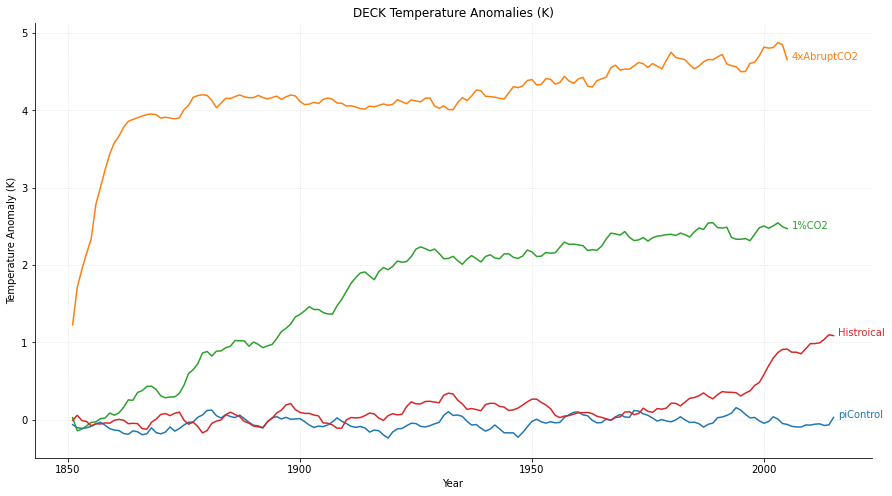

In [174]:
fig, ax = plt.subplots(figsize = (15,8))

time = nasa_anom_smean_roll.time.values
for scenario in nasa_anom_smean_roll.scenario.values:
    plot_line_with_annotation( nasa_anom_smean_roll.sel(scenario = scenario), 
                              label = scenario, deltax = 1)

ax.set_title('DECK Temperature Anomalies (K)');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Anomaly (K)')

ax.grid(alpha = 0.4, linestyle = ':')
stor = plt.gca()


ax.set_facecolor('white')

fig.savefig('../../images/PhD/init/nasa_deck_roll_weighted.png', bbox_inches = 'tight', dpi = 300)

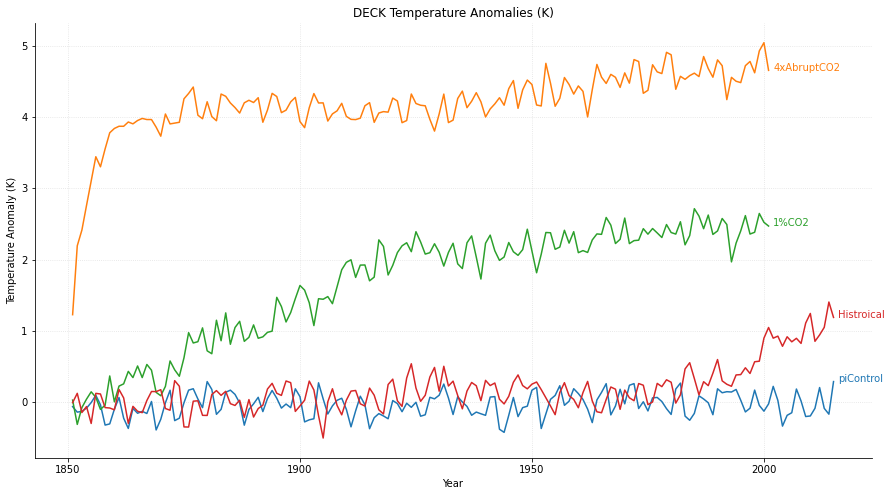

In [173]:
fig, ax = plt.subplots(figsize = (15,8))

time = nasa_anom_smean_roll.time.values
for scenario in nasa_anom_smean.scenario.values:
    plot_line_with_annotation( nasa_anom_smean.sel(scenario = scenario), 
                              label = scenario, deltax = 1)

ax.set_title('DECK Temperature Anomalies (K)');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Anomaly (K)')

ax.grid(alpha = 0.4, linestyle = ':')
stor = plt.gca()


ax.set_facecolor('white')

fig.savefig('../../images/PhD/init/nasa_deck_roll_weighted.png', bbox_inches = 'tight', dpi = 300)